<a href="https://colab.research.google.com/github/Romyull-Islam/Penalized-Regression/blob/main/penalized_regression_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load the data from MASS package

In [ ]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('https://r-data.pmagunia.com/system/files/datasets/dataset-70319.csv',dtype=np.float64)
data.head()
#https://r-data.pmagunia.com/system/files/datasets/dataset-70319.csv

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Define the predictors and response and train test split





In [ ]:
y=data['medv']
X = data.drop('medv', axis=1)

from sklearn.model_selection import train_test_split

#for initial testing purpose we are spliting train test from train data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

##Linear Regression or  Ordinary Least Squares


In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:

r_sq = model.score(X_train, y_train)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {model.intercept_}")


print(f"slope: {model.coef_}")

coefficient of determination: 0.7684382348473906
intercept: 23.855642872647742
slope: [-1.02196670e-01  3.05092153e-02  9.90743259e-02  1.35169810e-01
 -1.20283882e+01  5.04576935e+00 -7.00267196e-03 -1.16242480e+00
  2.79499772e-01 -1.27385555e-02 -9.24286339e-01  9.55113115e-03
 -5.04873386e-01]


##Evaluation metrics

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,median_absolute_error
from sklearn.metrics import mean_squared_log_error,r2_score,max_error
import math

In [ ]:
predict=model.predict(X_test)

In [ ]:

print(r2_score(y_test,predict))

# Mean Squared Error
print(mean_squared_error(y_test,predict))

#RMSE
math.sqrt(mean_squared_error(y_test,predict))

#mean_absolute_error
mean_absolute_error(y_test,predict)


0.6519355846296851
29.954042187345376


3.7919531604268926

# Penalization



*   When l1-ratio=0, Ridge Model is fit and 
*   if l1-ratio=1, a lasso model is fit.
*   if l1-ratio = (0, 1), a ELastic Net is fit
* alpha is the learning rate

The parameter l1_ratio corresponds to alpha in the glmnet R package while alpha corresponds to the lambda parameter in glmnet.











##Elastic Net

#Do the cross-validation first





In [ ]:
#Coordinate descent with alpha=0(l1_ratio) may lead to unexpected results and is discouraged. tha's why we are using logspace insteadt of linespace(0, 1, 100)

from sklearn.linear_model import ElasticNetCV
modelcv = ElasticNetCV(l1_ratio=np.logspace(-2, 0, 100), eps=0.00001,  alphas=np.logspace(-2, 2, 1000), fit_intercept=True,  precompute='auto', max_iter=1000, tol=0.0001, cv=None, copy_X=True)
modelcv.fit(X,y)

ElasticNetCV(alphas=array([1.00000000e-02, 1.00926219e-02, 1.01861017e-02, 1.02804473e-02,
       1.03756668e-02, 1.04717682e-02, 1.05687597e-02, 1.06666496e-02,
       1.07654461e-02, 1.08651577e-02, 1.09657929e-02, 1.10673602e-02,
       1.11698682e-02, 1.12733256e-02, 1.13777413e-02, 1.14831241e-02,
       1.15894830e-02, 1.16968270e-02, 1.18051653e-02, 1.19145070e-02,
       1.20248614e-02, 1.213623...
       0.20565123, 0.21544347, 0.22570197, 0.23644894, 0.24770764,
       0.25950242, 0.27185882, 0.28480359, 0.29836472, 0.31257158,
       0.32745492, 0.34304693, 0.35938137, 0.37649358, 0.39442061,
       0.41320124, 0.43287613, 0.45348785, 0.47508102, 0.49770236,
       0.52140083, 0.54622772, 0.57223677, 0.59948425, 0.62802914,
       0.65793322, 0.68926121, 0.7220809 , 0.75646333, 0.7924829 ,
       0.83021757, 0.869749  , 0.91116276, 0.95454846, 1.        ]))

In [ ]:
#alphas shows in the ElasticNetCV is l1 ratios. we can check it by this code
#print(np.logspace(-2, 0, 100))

In [ ]:
al=modelcv.alpha_
print(al)
dg=modelcv.dual_gap_
print(dg)
print(modelcv.l1_ratio_)
print(modelcv.feature_names_in_)

0.3711671819475765
0.007920659761442617
0.01
['crim' 'zn' 'indus' 'chas' 'nox' 'rm' 'age' 'dis' 'rad' 'tax' 'ptratio'
 'black' 'lstat']


In [ ]:
modelcv.alphas_

array([1.00000000e+02, 9.90822810e+01, 9.81729841e+01, 9.72720319e+01,
       9.63793480e+01, 9.54948564e+01, 9.46184819e+01, 9.37501502e+01,
       9.28897872e+01, 9.20373200e+01, 9.11926760e+01, 9.03557835e+01,
       8.95265713e+01, 8.87049689e+01, 8.78909065e+01, 8.70843150e+01,
       8.62851257e+01, 8.54932707e+01, 8.47086827e+01, 8.39312950e+01,
       8.31610415e+01, 8.23978568e+01, 8.16416760e+01, 8.08924349e+01,
       8.01500696e+01, 7.94145172e+01, 7.86857151e+01, 7.79636013e+01,
       7.72481145e+01, 7.65391939e+01, 7.58367791e+01, 7.51408106e+01,
       7.44512291e+01, 7.37679760e+01, 7.30909933e+01, 7.24202233e+01,
       7.17556092e+01, 7.10970943e+01, 7.04446228e+01, 6.97981391e+01,
       6.91575883e+01, 6.85229160e+01, 6.78940681e+01, 6.72709914e+01,
       6.66536327e+01, 6.60419396e+01, 6.54358602e+01, 6.48353429e+01,
       6.42403366e+01, 6.36507908e+01, 6.30666554e+01, 6.24878807e+01,
       6.19144176e+01, 6.13462172e+01, 6.07832313e+01, 6.02254120e+01,
      

In [ ]:
modelcv.coef_

array([-0.10091564,  0.05547719, -0.05184478,  0.39151473, -0.12582305,
        1.73637829,  0.00837755, -1.06739416,  0.32670058, -0.01638688,
       -0.8296388 ,  0.0089952 , -0.70221434])

Plot the model for different alphas

In [ ]:
n_alphas = 1000
alphas = np.logspace(-2, 2, n_alphas)
coefs = []
for a in alphas:
    ELN = linear_model.ElasticNet(l1_ratio=.01,alpha=a, fit_intercept=False)
    ELN.fit(X_train, y_train)
    coefs.append(ELN.coef_)

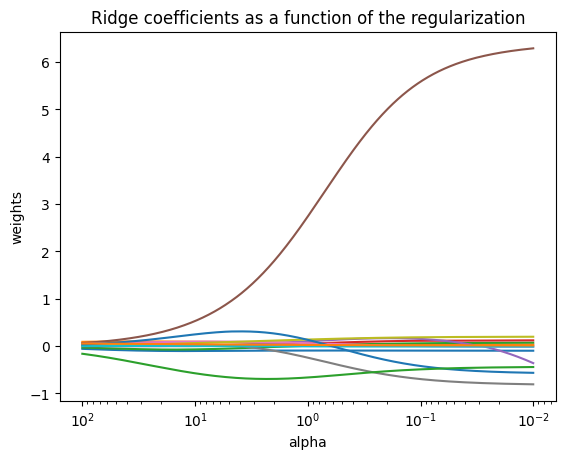

In [ ]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

#Using the best learning rate, we apply the model

In [ ]:
model2 = linear_model.ElasticNet(alpha=dg, l1_ratio=.01,  max_iter=1000, copy_X=True, tol=0.001)
model2.fit(X, y)

ElasticNet(alpha=0.007920659761442617, l1_ratio=0.01, tol=0.001)

#Output

In [ ]:
print(model2.n_features_in_)
print(model2.intercept_)
print(model2.coef_)

13
28.05226773371799
[-0.10205865  0.04855993 -0.03277249  2.29834514 -4.96328767  3.83211512
 -0.00989355 -1.28723443  0.27951505 -0.01351134 -0.81662214  0.00995611
 -0.54504738]


#Prediction

In [ ]:
prediction=model2.predict(X)
prediction

array([30.48914247, 24.64484543, 30.49335945, 29.15961462, 28.36368753,
       25.61326838, 22.96026448, 19.12400431, 10.85817874, 18.76852648,
       18.65702526, 21.48207268, 21.06396543, 20.44765834, 19.8435495 ,
       20.20134231, 21.75678298, 17.3760637 , 17.01888597, 18.97833529,
       12.58632316, 18.03066641, 16.06918534, 13.94317812, 16.00856687,
       13.74665335, 15.90366532, 15.03233898, 19.96453641, 21.34514457,
       11.60170607, 18.34639729,  8.86088638, 14.42104437, 13.71974649,
       23.73370863, 22.28689619, 23.4354204 , 23.31810505, 31.64894965,
       34.62699142, 28.41186286, 25.52171414, 24.90381562, 22.8314362 ,
       21.91854247, 20.17281366, 17.25316212,  7.99855381, 16.7923201 ,
       21.04880717, 23.64001981, 27.86215134, 24.17679576, 15.35310803,
       31.79562924, 25.40823695, 33.19316484, 22.49606059, 21.3997836 ,
       17.95680162, 18.19874969, 24.20181656, 23.11888991, 23.81070528,
       30.08825388, 24.9923904 , 20.92576459, 16.96424157, 20.46

#Evaluation metrics

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,median_absolute_error
from sklearn.metrics import mean_squared_log_error,r2_score,max_error

In [ ]:

#mean_squared_log_error(y_test, prediction) #Mean squared logarithmic error regression loss.

print(r2_score(y, prediction)) # (coefficient of determination) regression score function.
max_error(y, prediction) #The max_error metric calculates the maximum residual error.

0.7346200473018302


26.65572908510074





Accuracy

In [ ]:
model2.score(X, y)

0.7346200473018302

## Finidng MSE

In [ ]:
# Mean Squared Error
mean_squared_error(y,prediction)

22.403257819523706

In [ ]:
#RMSE


math.sqrt(mean_squared_error(y,prediction))

4.733207983970671

In [ ]:
#mean_absolute_error
mean_absolute_error(y,prediction)

3.2915523521134085

In [ ]:
median_absolute_error(y,prediction)

2.3370116597616644

#Use the regularised peremether for model including test data

In [ ]:
model3 = linear_model.ElasticNet(alpha=dg, l1_ratio=.01,  max_iter=1000, copy_X=True, tol=0.001)
model3.fit(X_train, y_train )

ElasticNet(alpha=0.007920659761442617, l1_ratio=0.01, tol=0.001)

In [ ]:
print(model3.n_features_in_)
print(model3.intercept_)
print(model3.coef_)

13
18.569662527168894
[-9.78218743e-02  3.09590509e-02  6.42883296e-02 -2.25540720e-04
 -3.19310737e+00  5.01570848e+00 -1.37406231e-02 -1.02907312e+00
  2.52674350e-01 -1.33842445e-02 -8.41261765e-01  9.82969831e-03
 -5.21447908e-01]


In [ ]:
prediction3=model3.predict(X_test)

In [ ]:
#Trainning accuracy
print(model3.score(X_train, y_train))

# (coefficient of determination)
print(r2_score(y_test,prediction3))

# Mean Squared Error
print(mean_squared_error(y_test,prediction3))

#RMSE
print(math.sqrt(mean_squared_error(y_test,prediction3)))

#mean_absolute_error
print(mean_absolute_error(y_test,prediction3))

#median_absolute_error
print(median_absolute_error(y_test,prediction3))

0.7657493747284922
0.6389007053796438
31.075809612341363
5.574568109938326
3.860144020014955
2.963402597288777
